In [ ]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(164, 3)
(164,)


In [ ]:
print(X_train)  # Check if all values are numeric
print(y_train)  # Check if all values are numeric


[['72' 2700 134]
 ['95' 3075 120]
 ['62' 2280 92]
 ['69' 1971 97]
 ['86' 2289 110]
 ['68' 1967 90]
 ['73' 2120 108]
 ['95' 3252 152]
 ['145' 2811 156]
 ['70' 1874 90]
 ['161' 2976 171]
 ['55' 2017 103]
 ['92' 2326 122]
 ['69' 2024 97]
 ['110' 2507 136]
 ['116' 2540 146]
 ['101' 2380 70]
 ['207' 2800 194]
 ['68' 1918 92]
 ['82' 2385 108]
 ['160' 3071 181]
 ['92' 2458 122]
 ['175' 2910 140]
 ['73' 2480 110]
 ['76' 1819 92]
 ['121' 2710 164]
 ['76' 2010 92]
 ['143' 2778 151]
 ['100' 2293 110]
 ['70' 2081 98]
 ['160' 2808 121]
 ['73' 2240 108]
 ['68' 1900 91]
 ['95' 3285 120]
 ['112' 2300 98]
 ['101' 2465 110]
 ['145' 2818 156]
 ['68' 2004 92]
 ['102' 2128 98]
 ['68' 1989 90]
 ['160' 2847 121]
 ['114' 2952 141]
 ['142' 3130 134]
 ['154' 2823 152]
 ['68' 1944 92]
 ['90' 2734 119]
 ['68' 2191 98]
 ['207' 2756 194]
 ['88' 2365 122]
 ['69' 2050 97]
 ['76' 2024 92]
 ['95' 3485 152]
 ['84' 2385 122]
 ['68' 1876 90]
 ['110' 2758 121]
 ['68' 2579 97]
 ['76' 1940 92]
 ['101' 2395 108]
 ['162' 3157 

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

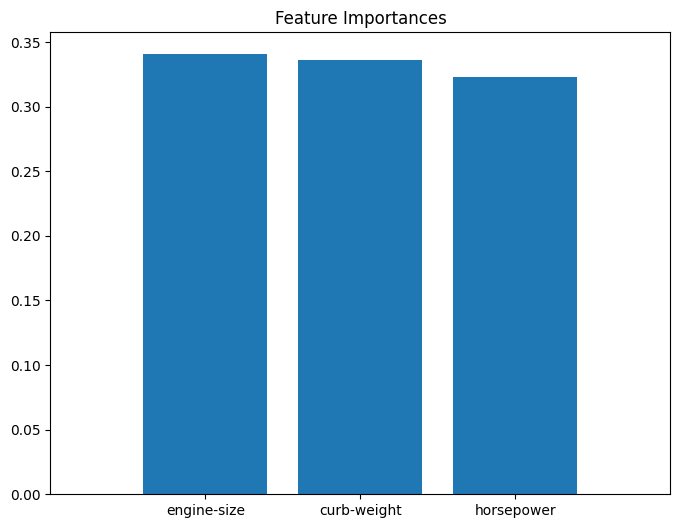

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Automobile dataset
data = pd.read_csv('Automobile_data.csv')

# Step 2: Preprocessing the dataset
# Check the first few rows to understand the data
print(data.head())

# Convert 'make' (car brands) to category codes (if it's a string column)
# Ensure 'make' is a categorical target
data['make'] = data['make'].astype('category').cat.codes

# Handle any missing values by dropping rows with NaN (you can also impute if necessary)
data = data.dropna()

# Select features (e.g., 'horsepower', 'curb-weight', 'engine-size')
# We need to ensure these columns are numeric
X = data[['horsepower', 'curb-weight', 'engine-size']].apply(pd.to_numeric, errors='coerce').values
y = data['make'].values  # The target variable is 'make' (car brands)

# Step 3: Check for NaN values in X and y
print("Any NaNs in X:", np.any(np.isnan(X)))  # Should return False
print("Any NaNs in y:", np.any(np.isnan(y)))  # Should return False

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of training sets
print("Shape of X_train:", X_train.shape)  # Should be (n_samples, n_features)
print("Shape of y_train:", y_train.shape)  # Should be (n_samples,)

# Step 5: Fit Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize the top features
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(['horsepower', 'curb-weight', 'engine-size'])[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


SyntaxError: unterminated string literal (detected at line 70) (<ipython-input-9-dc4156bcf173>, line 70)

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

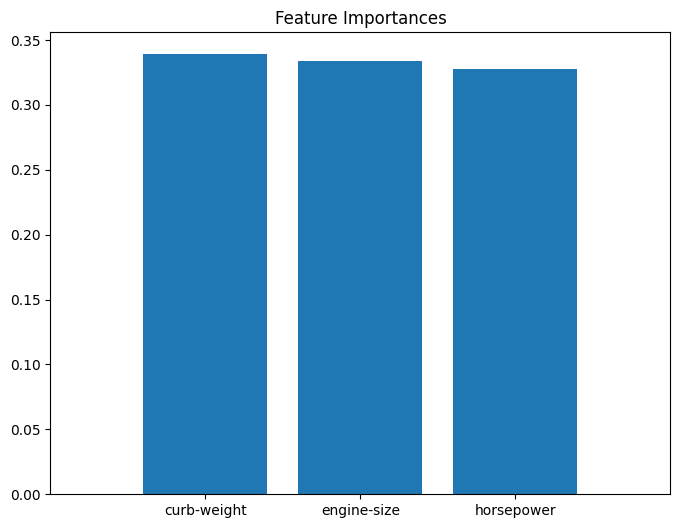

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Step 1: Load the Automobile dataset
data = pd.read_csv('Automobile_data.csv')

# Step 2: Clean the data by replacing '?' with NaN
# Replace '?' in numeric columns with NaN
data.replace('?', np.nan, inplace=True)

# Convert columns that should be numeric to the correct type
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower',
                   'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check the first few rows to ensure the data is cleaned
print(data.head())

# Step 3: Handle missing values by imputing with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Handle any missing categorical values by imputing with the mode (most frequent category)
imputer_cat = SimpleImputer(strategy='most_frequent')  # For categorical columns
categorical_columns = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                       'drive-wheels', 'engine-location', 'fuel-system']
data[categorical_columns] = imputer_cat.fit_transform(data[categorical_columns])

# Convert 'make' column (car brands) to category codes (if it's a string column)
data['make'] = data['make'].astype('category').cat.codes

# Select features (e.g., 'horsepower', 'curb-weight', 'engine-size')
X = data[['horsepower', 'curb-weight', 'engine-size']].values
y = data['make'].values  # The target variable is 'make' (car brands)

# Check for NaN values in X and y
print("Any NaNs in X:", np.any(np.isnan(X)))  # Should return False
print("Any NaNs in y:", np.any(np.isnan(y)))  # Should return False

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize the top features
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(['horsepower', 'curb-weight', 'engine-size'])[indices])
plt.xlim([-1, X.shape[1]])
plt.show()
